# Solve for general case

In [116]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

mu, alpha = sp.symbols('mu alpha',real=True,positive=True)
r = sp.symbols('r_sigma',real=True,positive=True)
r2 = sp.symbols('r_\sigma\'',real=True,positive=True)
eta1 = sp.symbols('\eta_sigma',real=True,positive=True)
eta2 = sp.symbols('\eta_{\sigma\'}',real=True,positive=True) 
eta = sp.symbols('\eta',real=True,positive=True)

phi = sp.symbols('phi',real=True)

In [117]:
eq = mu**2 * sp.sin(2*phi + alpha) - sp.sin(alpha)
dr = sp.Rational(1,2) / r * (1-r**4)* ( r**2 * sp.cos(alpha) + 2 * mu*eta*r2*r*sp.cos(alpha+phi) + mu **2 *eta**2 * r2**2 * sp.cos(alpha + 2*phi))


dpsi1 = -sp.Rational(1,2) *1/r**2 * (1+r**4)*( r**2  * sp.sin(alpha) + 2 * mu*eta*r2*r*sp.sin(alpha+phi) + mu **2 *eta**2 * r2**2 * sp.sin(alpha+2*phi))
dpsi2 = -sp.Rational(1,2) *1/r2**2 * (1+r2**4)*(eta**2 * r2**2  * sp.sin(alpha) + 2 * mu*eta*r2*r*sp.sin(alpha-phi) + mu **2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1

Dphi = sp.simplify(dphi.subs(r2,1))
Dr =  dr.subs(r2,1)

In [176]:
sp.print_latex(Dr.diff(r).subs(r,1))

- 2 \eta^{2} \mu^{2} \cos{\left(\alpha + 2 \phi \right)} - 4 \eta \mu \cos{\left(\alpha + \phi \right)} - 2 \cos{\left(\alpha \right)}


In [160]:
sp.print_latex(Dphi.diff(phi).subs(r,1))

2 \eta^{2} \mu^{2} \cos{\left(\alpha + 2 \phi \right)} + 2 \eta \mu \cos{\left(\alpha - \phi \right)} + 2 \eta \mu \cos{\left(\alpha + \phi \right)} + 2 \mu^{2} \cos{\left(\alpha - 2 \phi \right)}


In [161]:
sp.print_latex(Dphi.diff(r).subs(r,1))

- 2 \eta \mu \sin{\left(\alpha - \phi \right)} + 2 \eta \mu \sin{\left(\alpha + \phi \right)} - 2 \mu^{2} \sin{\left(\alpha - 2 \phi \right)} + 2 \sin{\left(\alpha \right)}


In [118]:
JRR = Dr.diff(r).subs(r,1)
JRphi = Dr.diff(phi).subs(r,1)
JphiR = Dphi.diff(r).subs(r,1)
Jphiphi = Dphi.diff(phi).subs(r,1)
J = sp.Matrix([[JRR,JRphi],[JphiR,Jphiphi]])
sp.print_latex(J)

\left[\begin{matrix}- 2 \eta^{2} \mu^{2} \cos{\left(\alpha + 2 \phi \right)} - 4 \eta \mu \cos{\left(\alpha + \phi \right)} - 2 \cos{\left(\alpha \right)} & 0\\- 2 \eta \mu \sin{\left(\alpha - \phi \right)} + 2 \eta \mu \sin{\left(\alpha + \phi \right)} - 2 \mu^{2} \sin{\left(\alpha - 2 \phi \right)} + 2 \sin{\left(\alpha \right)} & 2 \eta^{2} \mu^{2} \cos{\left(\alpha + 2 \phi \right)} + 2 \eta \mu \cos{\left(\alpha - \phi \right)} + 2 \eta \mu \cos{\left(\alpha + \phi \right)} + 2 \mu^{2} \cos{\left(\alpha - 2 \phi \right)}\end{matrix}\right]


In [163]:
print(sp.solve(JRR,mu)[0])

(-cos(alpha + phi) + Abs(sin(phi)))/(\eta*cos(alpha + 2*phi))


In [164]:
print(sp.solve(Jphiphi,mu)[0])

-2*\eta*cos(alpha)*cos(phi)/(\eta**2*cos(alpha + 2*phi) + cos(alpha - 2*phi))


In [142]:
sp.print_latex(sp.solve(Jphiphi,mu)[0])

- \frac{2 \eta \cos{\left(\alpha \right)} \cos{\left(\phi \right)}}{\eta^{2} \cos{\left(\alpha + 2 \phi \right)} + \cos{\left(\alpha - 2 \phi \right)}}


In [141]:
sp.print_latex(sp.solve(JRR,mu)[0])

\frac{- \cos{\left(\alpha + \phi \right)} + \left|{\sin{\left(\phi \right)}}\right|}{\eta \cos{\left(\alpha + 2 \phi \right)}}


In [99]:
JRR * Jphiphi

(-2*\eta**2*mu**2*cos(alpha + 2*phi) - 4*\eta*mu*cos(alpha + phi) - 2*cos(alpha))*(2*\eta**2*mu**2*cos(alpha + 2*phi) + 2*\eta*mu*cos(alpha - phi) + 2*\eta*mu*cos(alpha + phi) + 2*mu**2*cos(alpha - 2*phi))

In [118]:
print(JRR + Jphiphi)

2*\eta*mu*cos(alpha - phi) - 2*\eta*mu*cos(alpha + phi) + 2*mu**2*cos(alpha - 2*phi) - 2*cos(alpha)


In [77]:
print(sp.simplify(J.det()))

4*mu*(-\eta**4*mu**3*cos(alpha + 2*phi)**2 - \eta**3*mu**2*cos(alpha - phi)*cos(alpha + 2*phi) - 3*\eta**3*mu**2*cos(alpha + phi)*cos(alpha + 2*phi) - \eta**2*mu**3*cos(alpha - 2*phi)*cos(alpha + 2*phi) - \eta**2*mu*cos(alpha)*cos(alpha + 2*phi) - 2*\eta**2*mu*cos(alpha - phi)*cos(alpha + phi) - 2*\eta**2*mu*cos(alpha + phi)**2 - 2*\eta*mu**2*cos(alpha - 2*phi)*cos(alpha + phi) - \eta*cos(alpha)*cos(alpha - phi) - \eta*cos(alpha)*cos(alpha + phi) - mu*cos(alpha)*cos(alpha - 2*phi))


In [ ]:
4*mu*(-\eta**4*mu**3*cos(alpha + 2*phi)**2 - \eta**3*mu**2*cos(alpha - phi)*cos(alpha + 2*phi) - 3*\eta**3*mu**2*cos(alpha + phi)*cos(alpha + 2*phi) - \eta**2*mu**3*cos(alpha - 2*phi)*cos(alpha + 2*phi) - \eta**2*mu*cos(alpha)*cos(alpha + 2*phi) - 2*\eta**2*mu*cos(alpha - phi)*cos(alpha + phi) - 2*\eta**2*mu*cos(alpha + phi)**2 - 2*\eta*mu**2*cos(alpha - 2*phi)*cos(alpha + phi) - \eta*cos(alpha)*cos(alpha - phi) - \eta*cos(alpha)*cos(alpha + phi) - mu*cos(alpha)*cos(alpha - 2*phi))


# Case $r = 1$

해봐야 하는 일
1. 일단 1

In [119]:
mu_coeff = Dphi.subs(r,1).expand().collect(mu,evaluate=False)
mu2 = mu_coeff[mu**2]
mu1 = mu_coeff[mu].trigsimp()/2
mu0 = mu_coeff[1].trigsimp()

In [4]:
sp.solve(Dphi.subs(r,1).expand(),mu)

[(-2*\eta*sin(phi)*cos(alpha) - sqrt(\eta**4*cos(2*phi)/2 - \eta**4*cos(2*alpha + 2*phi)/2 + \eta**2*cos(2*alpha) - 2*\eta**2*cos(2*phi) + \eta**2 + cos(2*phi)/2 - cos(2*alpha - 2*phi)/2))/(\eta**2*sin(alpha + 2*phi) - sin(alpha - 2*phi)),
 (-2*\eta*sin(phi)*cos(alpha) + sqrt(\eta**4*cos(2*phi)/2 - \eta**4*cos(2*alpha + 2*phi)/2 + \eta**2*cos(2*alpha) - 2*\eta**2*cos(2*phi) + \eta**2 + cos(2*phi)/2 - cos(2*alpha - 2*phi)/2))/(\eta**2*sin(alpha + 2*phi) - sin(alpha - 2*phi))]

In [121]:
Mu = sp.trigsimp((-mu1 + sp.sqrt(mu1**2 - mu2*mu0))/mu2)

In [123]:
D_mu,N_mu = sp.fraction(Mu)

In [132]:
D_mu.diff(phi)

-2*\eta*cos(alpha)*cos(phi) + (4*\eta**2*sin(phi)*cos(alpha)**2*cos(phi) + (\eta**2 - 1)*(2*\eta**2*cos(alpha + 2*phi) + 2*cos(alpha - 2*phi))*sin(alpha)/2)/sqrt(4*\eta**2*sin(phi)**2*cos(alpha)**2 + (\eta**2 - 1)*(\eta**2*sin(alpha + 2*phi) - sin(alpha - 2*phi))*sin(alpha))

In [134]:
D_mu.diff(phi)

-2*\eta*cos(alpha)*cos(phi) + (4*\eta**2*sin(phi)*cos(alpha)**2*cos(phi) + (\eta**2 - 1)*(2*\eta**2*cos(alpha + 2*phi) + 2*cos(alpha - 2*phi))*sin(alpha)/2)/sqrt(4*\eta**2*sin(phi)**2*cos(alpha)**2 + (\eta**2 - 1)*(\eta**2*sin(alpha + 2*phi) - sin(alpha - 2*phi))*sin(alpha))

In [6]:
print(sp.solve(Dphi.subs(r,1),mu)[0])

(-2*\eta*sin(phi)*cos(alpha) - sqrt(\eta**4*cos(2*phi)/2 - \eta**4*cos(2*alpha + 2*phi)/2 + \eta**2*cos(2*alpha) - 2*\eta**2*cos(2*phi) + \eta**2 + cos(2*phi)/2 - cos(2*alpha - 2*phi)/2))/(\eta**2*sin(alpha + 2*phi) - sin(alpha - 2*phi))


In [7]:
(-2*eta*np.sin(phi)*np.cos(alpha) - np.sqrt(eta**4*np.cos(2*phi)/2 - eta**4*np.cos(2*alpha + 2*phi)/2 + eta**2*np.cos(2*alpha) - 2*eta**2*np.cos(2*phi) + eta**2 + np.cos(2*phi)/2 - np.cos(2*alpha - 2*phi)/2))/(eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi))

TypeError: loop of ufunc does not support argument 0 of type Symbol which has no callable sin method

In [8]:
def get_r_1_mup(alpha,phi,eta = 100):
    mu2 = eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi)
    mu1 = 2*eta*np.sin(phi)*np.cos(alpha)
    mu0 = (1 - eta**2)*np.sin(alpha)
    mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
    return mu

In [9]:
def get_r_1_mum(alpha,phi,eta = 100):
    mu2 = eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi)
    mu1 = 2*eta*np.sin(phi)*np.cos(alpha)
    mu0 = (1 - eta**2)*np.sin(alpha)
    mu = (-mu1 - np.sqrt(mu1**2 - mu2*mu0))/mu2
    return mu

In [177]:
mu2 = eta**2*sp.sin(alpha + 2*phi) - sp.sin(alpha - 2*phi)
mu1 = 2*eta*sp.sin(phi)*sp.cos(alpha)
mu0 = (1 - eta**2)*sp.sin(alpha)
Mu = (-mu1 - sp.sqrt(mu1**2 - mu2*mu0))/mu2

sp.print_latex(Mu)

\frac{- 2 \eta \sin{\left(\phi \right)} \cos{\left(\alpha \right)} - \sqrt{4 \eta^{2} \sin^{2}{\left(\phi \right)} \cos^{2}{\left(\alpha \right)} - \left(1 - \eta^{2}\right) \left(\eta^{2} \sin{\left(\alpha + 2 \phi \right)} - \sin{\left(\alpha - 2 \phi \right)}\right) \sin{\left(\alpha \right)}}}{\eta^{2} \sin{\left(\alpha + 2 \phi \right)} - \sin{\left(\alpha - 2 \phi \right)}}


In [181]:
sp.print_latex(Mu.diff(phi).simplify())

\frac{\left(\eta^{2} \sin{\left(\alpha + 2 \phi \right)} - \sin{\left(\alpha - 2 \phi \right)}\right) \left(- 4 \eta^{2} \sin{\left(\phi \right)} \cos^{2}{\left(\alpha \right)} \cos{\left(\phi \right)} - 2 \eta \sqrt{4 \eta^{2} \sin^{2}{\left(\phi \right)} \cos^{2}{\left(\alpha \right)} + \left(\eta^{2} - 1\right) \left(\eta^{2} \sin{\left(\alpha + 2 \phi \right)} - \sin{\left(\alpha - 2 \phi \right)}\right) \sin{\left(\alpha \right)}} \cos{\left(\alpha \right)} \cos{\left(\phi \right)} + \left(1 - \eta^{2}\right) \left(\eta^{2} \cos{\left(\alpha + 2 \phi \right)} + \cos{\left(\alpha - 2 \phi \right)}\right) \sin{\left(\alpha \right)}\right) + 2 \left(\eta^{2} \cos{\left(\alpha + 2 \phi \right)} + \cos{\left(\alpha - 2 \phi \right)}\right) \left(2 \eta \sin{\left(\phi \right)} \cos{\left(\alpha \right)} + \sqrt{4 \eta^{2} \sin^{2}{\left(\phi \right)} \cos^{2}{\left(\alpha \right)} + \left(\eta^{2} - 1\right) \left(\eta^{2} \sin{\left(\alpha + 2 \phi \right)} - \sin{\left(\alpha - 2 \ph

In [64]:
SIM_DET = sp.simplify(JRR * Jphiphi)
print(SIM_DET)

-4*mu*(\eta**2*mu**2*cos(alpha + 2*phi) + 2*\eta*mu*cos(alpha + phi) + cos(alpha))*(\eta**2*mu*cos(alpha + 2*phi) + \eta*cos(alpha - phi) + \eta*cos(alpha + phi) + mu*cos(alpha - 2*phi))


In [ ]:
-4*mu*(eta**2*mu**2*np.cos(alpha + 2*phi) + 2*eta*mu*np.cos(alpha + phi) + np.cos(alpha))*(eta**2*mu*np.cos(alpha + 2*phi) + eta*np.cos(alpha - phi) + eta*np.cos(alpha + phi) + mu*np.cos(alpha - 2*phi))


In [ ]:
-4*mu*(eta**2*mu**2*np.cos(alpha + 2*phi) + 2*eta*mu*np.cos(alpha + phi) + np.cos(alpha))*(eta**2*mu*np.cos(alpha + 2*phi) + eta*np.cos(alpha - phi) + eta*np.cos(alpha + phi) + mu*np.cos(alpha - 2*phi))


In [ ]:
-4*mu*(eta**2*mu**2*np.cos(alpha + 2*phi) + 2*eta*mu*np.cos(alpha + phi) + np.cos(alpha))*(eta**2*mu*np.cos(alpha + 2*phi) + eta*np.cos(alpha - phi) + eta*np.cos(alpha + phi) + mu*np.cos(alpha - 2*phi))

In [ ]:
def get_r_1_mum(alpha,phi,eta = 100):
    return (-2*eta*np.sin(phi)*np.cos(alpha) + np.sqrt(eta**4*np.cos(2*phi)/2 - eta**4*np.cos(2*alpha + 2*phi)/2 + eta**2*np.cos(2*alpha) - 2*eta**2*np.cos(2*phi) + eta**2 + np.cos(2*phi)/2 - np.cos(2*alpha - 2*phi)/2))/(eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi))


C:\Users\kim9y\AppData\Local\Temp\ipykernel_35724\1290055947.py:5: RuntimeWarning: invalid value encountered in sqrt
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35724\1290055947.py:5: RuntimeWarning: invalid value encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2


(0.0, 1.5707963267948966)

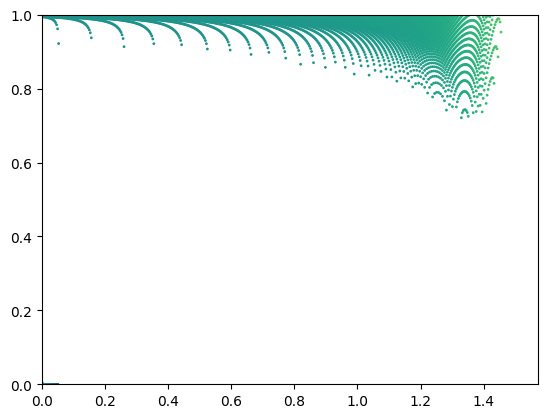

In [23]:
alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,500)
AL,PH = np.meshgrid(alpha,phi)

# plt.pcolormesh(AL,PH,get_r_1_mum(AL,PH,eta = 100),cmap='bwr')
MU = get_r_1_mup(AL,PH,eta =0.9)
plt.scatter(AL,MU,c=PH,s=1)
plt.ylim(0,1)
plt.xlim(0,np.pi/2)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_16240\1290055947.py:5: RuntimeWarning: invalid value encountered in sqrt
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
C:\Users\kim9y\AppData\Local\Temp\ipykernel_16240\1290055947.py:5: RuntimeWarning: invalid value encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2


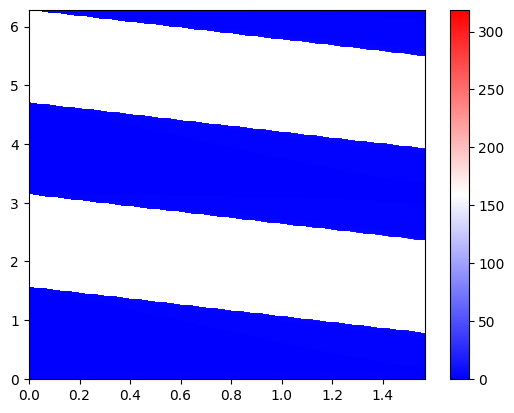

In [37]:
MU = get_r_1_mup(AL,PH,eta =1000)
plt.pcolormesh(AL,PH,MU,cmap='bwr')
plt.colorbar()


In [38]:
MU

array([[        nan,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.        ,  0.33217055,  0.44609089, ...,  1.00003964,
         1.00007928,  1.00011893],
       [ 0.        ,  0.24142482,  0.33223627, ...,  1.00039656,
         1.00047591,  1.00055528],
       ...,
       [-0.00200063,         nan,         nan, ...,  1.00087292,
         1.00079348,  1.00071406],
       [-0.00200016,         nan,         nan, ...,  1.00027756,
         1.00023789,  1.00019823],
       [-0.002     ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

In [16]:
MU = get_r_1_mup(AL,PH,eta =99)

MU =np.where((0<=MU)&(MU<=1),MU,np.nan)
plt.scatter(AL,MU,s=1)
plt.ylim(0,1)
plt.xlim(0,np.pi/2)

NameError: name 'AL' is not defined

(0.0, 1.5707963267948966)

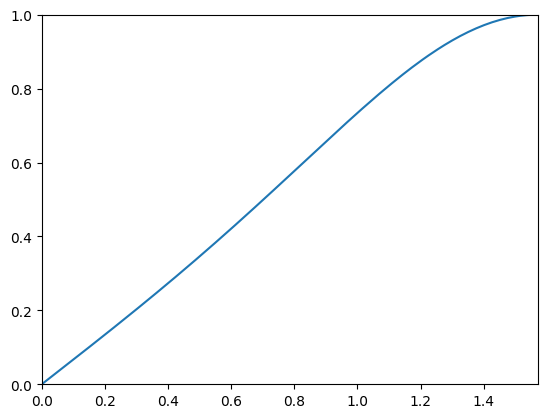

In [45]:
plt.plot(alpha,np.nanmin(MU,axis=0))
plt.ylim(0,1)
plt.xlim(0,np.pi/2)

In [46]:
np.argmin(MU,axis=0)

array([  0, 249, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238,
       237, 236, 235, 234, 233,   0, 231, 230, 229, 228, 227, 226, 225,
       225, 224, 223, 222, 221, 220, 219, 218, 217, 216,   0, 214, 214,
       213, 212, 211, 210, 209, 208, 207, 207, 206, 205, 204, 203, 202,
       202, 201, 200, 199, 198, 198, 197, 196, 195, 195, 194, 193, 192,
       192, 191, 190, 189, 189, 188, 187, 187,   0, 185, 184, 184, 183,
       182, 182, 181, 180, 180, 179, 178, 178, 177, 177, 176, 175, 175,
       174, 173, 173, 172, 172, 171, 171, 170, 169, 169, 168, 168, 167,
       167, 166, 165, 165, 164, 164, 163, 163, 162, 162, 161, 161, 160,
       160, 159, 159, 158, 158, 157, 157, 156, 156, 155, 155, 154, 154,
       153, 153, 153, 152, 152, 151, 151, 150, 150, 149, 149, 149, 148,
       148, 147, 147, 146, 146, 146, 145, 145, 144, 144, 144, 143, 143,
       142, 142, 142, 141, 141, 140, 140, 140, 139, 139, 138, 138, 138,
       137, 137, 137, 136, 136, 136, 135, 135, 134, 134, 134, 13

In [26]:

MU =np.where((0<=MU)&(MU<=1),MU,np.nan)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_35724\880697130.py:1: RuntimeWarning: All-NaN slice encountered
  plt.plot(phi,np.nanmin(MU,axis=0))


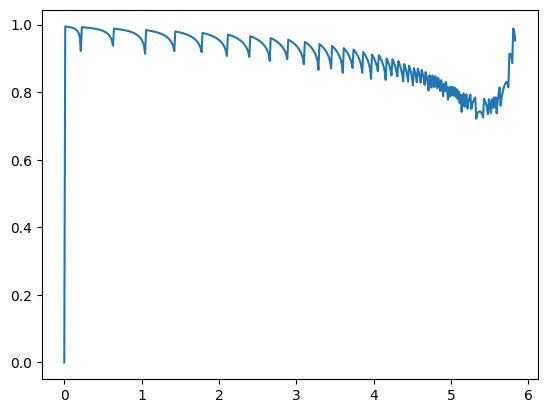

In [27]:
plt.plot(phi,np.nanmin(MU,axis=0))
# plt.ylim(0,1)
# plt.xlim(0,np.pi/2)

Text(0, 0.5, '$\\phi$')

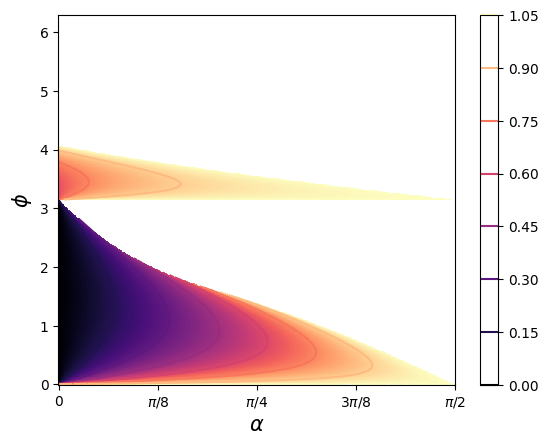

In [48]:
plt.pcolormesh(AL,PH,MU,cmap='magma')
plt.contour(AL,PH,MU,cmap='magma')
plt.colorbar()
plt.xlabel(r'$\alpha$',fontsize=15)
plt.xticks([0,np.pi/8,np.pi/4,3*np.pi/8,np.pi/2],[r'$0$',r'$\pi/8$',r'$\pi/4$',r'$3\pi/8$',r'$\pi/2$'])
plt.ylabel(r'$\phi$',fontsize=15)

# Check fixed point

In [165]:
def get_det0(alpha,phi,eta = 100):
    return (-np.cos(alpha + phi) + (np.sin(phi)))/(eta*np.cos(alpha + 2*phi))
def get_det1(alpha,phi,eta = 100):
    return (-np.cos(alpha + phi) - (np.sin(phi)))/(eta*np.cos(alpha + 2*phi))
def get_det2(alpha,phi,eta = 100):
    return -2*eta*np.cos(alpha)*np.cos(phi)/(eta**2*np.cos(alpha + 2*phi) + np.cos(alpha - 2*phi))


In [148]:
alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,10000)

In [ ]:
alphas = np.linspace(0,np.pi/2,20)[:-1]
colors = plt.cm.magma(np.linspace(0,1,len(alphas)))

C:\Users\kim9y\AppData\Local\Temp\ipykernel_35724\3350151213.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(phi,det,s=0.01,c=color)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35724\3350151213.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(phi,detm,s=0.01,c=color)


(0.0, 1.0)

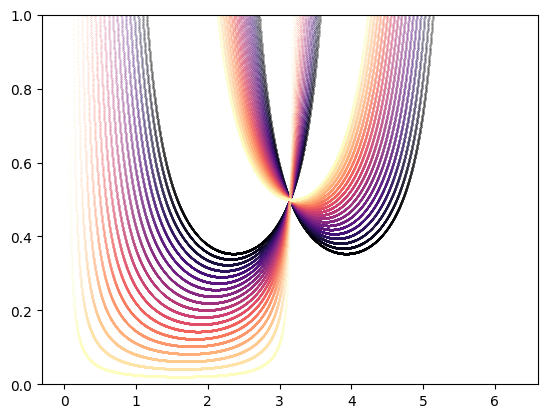

In [153]:
for alpha,color in zip(alphas,colors):
    det = get_det0(alpha,phi,eta =2)
    detm = get_det1(alpha,phi,eta =2)
    plt.scatter(phi,det,s=0.01,c=color)
    plt.scatter(phi,detm,s=0.01,c=color)
plt.ylim(0,1)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_35724\1290055947.py:5: RuntimeWarning: invalid value encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35724\2436576781.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(phi,det0,s=0.01,c=color)
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35724\2436576781.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 1.0)

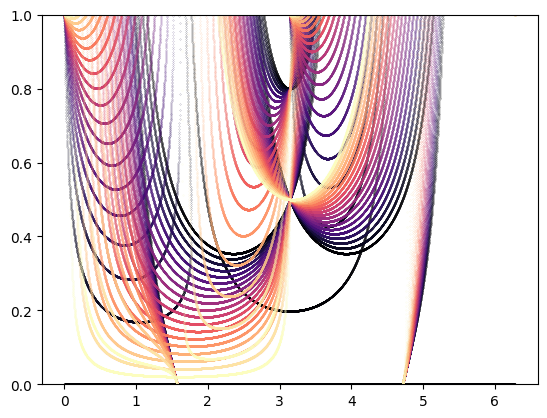

In [166]:
alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,10000)

# plt.pcolormesh(AL,PH,get_r_1_mum(AL,PH,eta = 100),cmap='bwr')
alphas = np.linspace(0,np.pi/2,20)[:-1]
colors = plt.cm.magma(np.linspace(0,1,len(alphas)))
for alpha,color in zip(alphas,colors):
    mu = get_r_1_mup(alpha,phi,eta =10)
    mum = get_r_1_mum(alpha,phi,eta =10)
    det0 = get_det0(alpha,phi,eta =2)
    det1 = get_det1(alpha,phi,eta =2)
    det2 = get_det2(alpha,phi,eta =2)
    plt.scatter(phi,det0,s=0.01,c=color)
    plt.scatter(phi,det1,s=0.01,c=color)
    plt.scatter(phi,det2,s=0.01,c=color)
    plt.scatter(phi,mu,s=0.01,c=color)
    plt.scatter(phi,mum,s=0.01,c=color)
plt.ylim(0,1)

In [ ]:
alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,10000)

# colormap 생성
alphas = np.linspace(0,np.pi/2,20)[:-1]
norm = plt.Normalize(vmin=0, vmax=np.pi/2)
cmap = plt.cm.magma

# 새로운 figure와 axes 생성
fig, ax = plt.subplots()
eta = 2

# 데이터 플롯
for alpha in alphas:
    color = cmap(norm(alpha))
    mu = get_r_1_mup(alpha,phi,eta=eta)
    mum = get_r_1_mum(alpha,phi,eta=eta)
    ax.scatter(phi,mu,s=0.1,c=[color])
    # ax.scatter(phi,mum,s=0.1,c=[color])

ax.set_ylim(0,1.2)

# colorbar 추가
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label=r'$\alpha$')
plt.xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],[r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])

plt.xlim(0,np.pi*2)
plt.axhline(1)
plt.xlabel(r'$\phi$',fontsize=15)
plt.ylabel(r'$\mu$',fontsize=15)
plt.title(rf'$\eta={eta}$',fontsize=15)
plt.show()

C:\Users\kim9y\AppData\Local\Temp\ipykernel_35724\1290055947.py:5: RuntimeWarning: invalid value encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35724\1290055947.py:5: RuntimeWarning: invalid value encountered in sqrt
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2


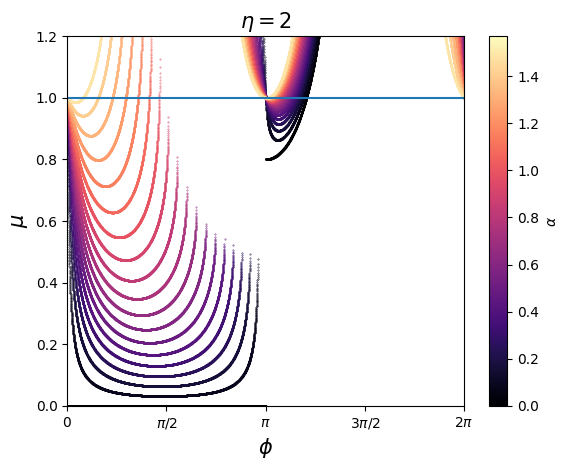

In [172]:
alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,10000)

# colormap 생성
alphas = np.linspace(0,np.pi/2,20)[:-1]
norm = plt.Normalize(vmin=0, vmax=np.pi/2)
cmap = plt.cm.magma

# 새로운 figure와 axes 생성
fig, ax = plt.subplots()
eta = 2

# 데이터 플롯
for alpha in alphas:
    color = cmap(norm(alpha))
    mu = get_r_1_mup(alpha,phi,eta=eta)
    mum = get_r_1_mum(alpha,phi,eta=eta)
    ax.scatter(phi,mu,s=0.1,c=[color])
    # ax.scatter(phi,mum,s=0.1,c=[color])

ax.set_ylim(0,1.2)

# colorbar 추가
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label=r'$\alpha$')
plt.xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],[r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])

plt.xlim(0,np.pi*2)
plt.axhline(1)
plt.xlabel(r'$\phi$',fontsize=15)
plt.ylabel(r'$\mu$',fontsize=15)
plt.title(rf'$\eta={eta}$',fontsize=15)
plt.show()

In [119]:
def get_sim_det(alpha,phi,mu,eta):
    det = -4*mu*(eta**2*mu**2*np.cos(alpha + 2*phi) + 2*eta*mu*np.cos(alpha + phi) + np.cos(alpha))*(eta**2*mu*np.cos(alpha + 2*phi) + eta*np.cos(alpha - phi) + eta*np.cos(alpha + phi) + mu*np.cos(alpha - 2*phi))
    return det

def get_sim_trace(alpha,phi,mu,eta):
    trace = 2*eta*mu*np.cos(alpha - phi) - 2*eta*mu*np.cos(alpha + phi) + 2*mu**2*np.cos(alpha - 2*phi) - 2*np.cos(alpha)
    return trace

In [126]:
def get_F(det, trace):
    result = np.zeros_like(det)
    result = np.where(det == 0, -2, result)
    result = np.where(det == -1, 0, result)
    result = np.where((det == 1) & (trace == -1), -1, result) 
    result = np.where((det == 1) & (trace != -1), 1, result)
    return result

In [127]:
get_F(S_det,S_trace)

array([0., 0., 0., ..., 0., 0., 0.])

C:\Users\kim9y\AppData\Local\Temp\ipykernel_35724\1290055947.py:5: RuntimeWarning: invalid value encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35724\1290055947.py:5: RuntimeWarning: invalid value encountered in sqrt
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2


[-5.38017850e+16 -6.64219374e+14 -8.60827808e+13 ...  1.61999008e-01
  1.61999999e-01             nan]
[-3.51969846e+16 -7.63867908e+14 -7.82365469e+13 ...  9.33914525e-01
  9.33915742e-01             nan]
[-3.77816707e+17 -3.92525844e+14 -1.15035388e+14 ...  8.62992347e-01
  8.62992719e-01             nan]
[-4.59058333e+16 -3.68632652e+16 -6.79312334e+14 ...  7.49777483e-01
  7.49778270e-01             nan]
[-8.10353492e+15 -1.28380198e+15 -4.90416228e+13 ...  6.02387783e-01
  6.02388165e-01             nan]
[-3.15888278e+15 -2.25803300e+15 -3.47720249e+13 ...  4.33472113e-01
  4.33472119e-01             nan]
[-4.33751151e+15 -1.41399353e+15 -8.78540324e+13 ...  2.61430411e-01
  2.61430655e-01             nan]
[-3.25177853e+21 -1.37235058e+14 -1.22462270e+14 ...  1.19843089e-01
  1.19868662e-01             nan]
[-4.76666033e+15 -7.84374806e+14 -2.93199126e+13 ...  1.06658724e-01
  1.06685249e-01             nan]
[-1.29952249e+16 -3.43555065e+14 -3.22266504e+13 ...  9.26695520e-02
  9.

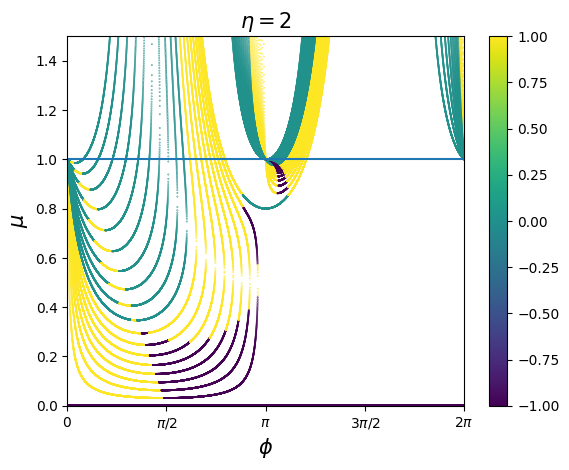

In [128]:
alpha = np.linspace(0,np.pi/2,501)[:-1]
phi = np.linspace(0,np.pi*2,10000)

# colormap 생성
alphas = np.linspace(0,np.pi/2,20)[:-1]
norm = plt.Normalize(vmin=0, vmax=np.pi/2)
cmap = plt.cm.magma

# 새로운 figure와 axes 생성
fig, ax = plt.subplots()
eta = 2

# 데이터 플롯
for alpha in alphas:
    color = cmap(norm(alpha))
    mu = get_r_1_mup(alpha,phi,eta=eta)
    mum = get_r_1_mum(alpha,phi,eta=eta)
    det = get_sim_det(alpha,phi,mu,eta=eta)
    detm = get_sim_det(alpha,phi,mum,eta=eta)
    trace = get_sim_trace(alpha,phi,mu,eta=eta)
    tracem = get_sim_trace(alpha,phi,mum,eta=eta)
    
    S_det = np.sign(det)
    S_trace = np.sign(trace)
    S_detm = np.sign(detm)
    S_tracem = np.sign(tracem)

    SS = get_F(S_det,S_trace)
    SSMM = get_F(S_detm,S_tracem)

    print(np.unique(det))
    plt.scatter(phi,mu,c=SS,s=0.1,)
    plt.scatter(phi,mum,c=SSMM,s=0.1,)

plt.ylim(0,1.5)

# colorbar 추가

plt.colorbar()
plt.xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],[r'$0$',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])

plt.xlim(0,np.pi*2)
plt.axhline(1)
plt.xlabel(r'$\phi$',fontsize=15)
plt.ylabel(r'$\mu$',fontsize=15)
plt.title(rf'$\eta={eta}$',fontsize=15)
plt.show()

In [135]:
from scipy.optimize import minimize_scalar  

In [140]:
# φ는 주어진 0 ~ 2π 범위를 그대로 쓰고,
phi = np.linspace(0, 2*np.pi, 10_000)

# α는 원하는 해상도로 – 여기선 0 ~ π/2 (끝점 제외) 500 점
alphas = np.linspace(0, np.pi/2, 501)[:-1]
eta = 20

def get_r_1_mup(alpha,phi,eta = 100):
    mu2 = eta**2*np.sin(alpha + 2*phi) - np.sin(alpha - 2*phi)
    mu1 = 2*eta*np.sin(phi)*np.cos(alpha)
    mu0 = (1 - eta**2)*np.sin(alpha)
    mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
    return mu
def get_mu_min(alphas,eta=100):
    mu_min = []

    for a in alphas:
        # ① 값 계산
        mu_vals = get_r_1_mup(a, phi, eta=eta)

        # ② 불연속·무의미(음수/1 초과/NaN) 구간 제거
        mask = np.isfinite(mu_vals) & (0 <= mu_vals) & (mu_vals <= 1)
        if not mask.any():          # 유효 구간이 전혀 없으면 NaN으로 채움
            mu_min.append(np.nan)
            continue

        # ③ 격자 상 최소값과 대응 φ
        idx = np.argmin(mu_vals[mask])
        mu_star = mu_vals[mask][idx]
        phi_star = phi[mask][idx]

        # ④ (선택) 최소 위치 근방을 SciPy로 미세 보정
        try:
            res = minimize_scalar(
                lambda x: get_r_1_mup(a, x, eta=eta),
                bounds=(max(phi_star-0.002, 0), min(phi_star+0.002, 2*np.pi)),
                method='bounded'
            )
            if res.success and 0 <= res.fun <= 1:
                mu_star = res.fun
        except Exception:
            pass        # SciPy가 없는 경우 그냥 격자값 사용

        mu_min.append(mu_star)

    mu_min = np.array(mu_min)
    return mu_min

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_35879/1290055947.py:5: RuntimeWarning: invalid value encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_35879/1290055947.py:5: RuntimeWarning: divide by zero encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_35879/1290055947.py:5: RuntimeWarning: invalid value encountered in sqrt
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2


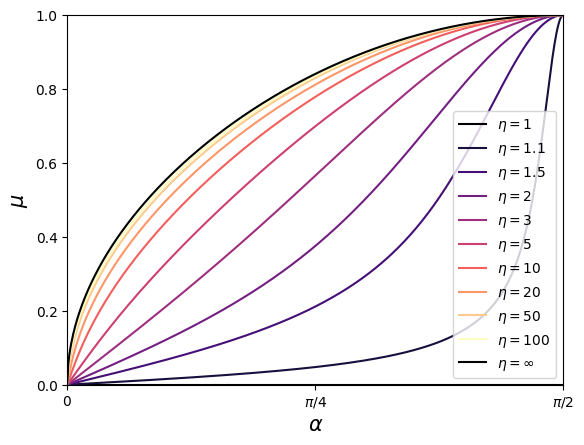

In [166]:
fig, ax = plt.subplots()

etas = [1,1.1,1.5,2,3,5,10,20,50,100]
colors = plt.cm.magma(np.linspace(0,1,len(etas)))


for eta,color in zip(etas,colors):
    mu_min = get_mu_min(alphas,eta=eta)
    ax.plot(alphas, mu_min,color=color,label=f'$\eta={eta}$')
ax.plot(alphas,np.sqrt(np.sin(alphas)),color='black',label=r'$\eta=\infty$')
    
ax.legend()

# ax.plot(alphas, mu_min)

ax.set_xlabel(r'$\alpha$',fontsize=15)
ax.set_ylabel(r'$\mu$',fontsize=15)
# ax.set_title(fr'$\eta={eta}, 0≤\mu≤1$',fontsize=15)
ax.set_xlim(0, np.pi/2)
ax.set_ylim(0, 1.05)
ax.set_xticks([0, np.pi/4, np.pi/2],
              [r'$0$', r'$\pi/4$', r'$\pi/2$'])
# ax.grid(alpha=.3)
plt.ylim(0,1)
plt.show()

# $r\neq1$ case

In [ ]:
phi = np.linspace(0, 2*np.pi, 10_000)

# α는 원하는 해상도로 – 여기선 0 ~ π/2 (끝점 제외) 500 점
alphas = np.linspace(0, np.pi/2, 501)[:-1]

## Fixed point visualization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from numba import jit

from Simul import get_RQ_MOA4,get_RQ_MOA5,get_RQ_MOA2,get_R_simul_wfT,get_RQ_MOA6,get_Q2,get_Q3

In [3]:
@jit(nopython=True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

In [3]:
eq = mu**2 * sp.sin(2*phi + alpha) - sp.sin(alpha)
dr = sp.Rational(1,2) / r * (1-r**4)* ( r**2 * sp.cos(alpha) + 2 * mu*eta*r2*r*sp.cos(alpha+phi) + mu **2 *eta**2 * r2**2 * sp.cos(alpha + 2*phi))


dpsi1 = -sp.Rational(1,2) *1/r**2 * (1+r**4)*( r**2  * sp.sin(alpha) + 2 * mu*eta*r2*r*sp.sin(alpha+phi) + mu **2 *eta**2 * r2**2 * sp.sin(alpha+2*phi))
dpsi2 = -sp.Rational(1,2) *1/r2**2 * (1+r2**4)*(eta**2 * r2**2  * sp.sin(alpha) + 2 * mu*eta*r2*r*sp.sin(alpha-phi) + mu **2 * r**2 * sp.sin(alpha-2*phi))
dphi = dpsi2 - dpsi1

Dphi = sp.simplify(dphi.subs(r2,1))
Dr =  dr.subs(r2,1)

NameError: name 'mu' is not defined

In [119]:
np.min([-1,1])


-1

In [3]:
args = ()
@jit(nopython=True)
def myFun4(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    mu,alpha,eta1,eta2 = args
    # r = np.abs(r)
    r2 = 1
    # r = np.min([r,1])
    # r = np.max([r,1e-5])
    dr = 0.5 / r * (1-r**4)* ( eta1**2*r**2 * np.cos(alpha) + 2 * mu*eta1*eta2*r2*r*np.cos(alpha+phi) + mu **2 *eta2**2 * r2**2 * np.cos(alpha + 2*phi))

    dpsi1 = -0.5 *1/r**2 * (1+r**4)*( eta1**2* r**2  * np.sin(alpha) + 2 * mu*eta1*eta2*r2*r*np.sin(alpha+phi) + mu **2 *eta2**2 * r2**2 * np.sin(alpha+2*phi))
    dpsi2 = -0.5 *1/r2**2 * (1+r2**4)*(eta2**2 * r2**2  * np.sin(alpha) + 2 * mu*eta1*eta2*r2*r*np.sin(alpha-phi) + eta1**2*mu **2 * r**2 * np.sin(alpha-2*phi))
    dphi = dpsi2 - dpsi1

    return np.array([dr,dphi])


def myFun5(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    mu,alpha,eta1,eta2 = args
    # r = np.min([r,1])
    # r = np.max([r,1e-5])
    # r = np.abs(r)
    r2 = 1

    dr = 0.5 / r * (1-r**4)* ( eta1**2*r**2 * np.cos(alpha) + 2 * mu*eta1*eta2*r2*r*np.cos(alpha+phi) + mu **2 *eta2**2 * r2**2 * np.cos(alpha + 2*phi))

    dpsi1 = -0.5 *1/r**2 * (1+r**4)*( eta1**2* r**2  * np.sin(alpha) + 2 * mu*eta1*eta2*r2*r*np.sin(alpha+phi) + mu **2 *eta2**2 * r2**2 * np.sin(alpha+2*phi))
    dpsi2 = -0.5 *1/r2**2 * (1+r2**4)*(eta2**2 * r2**2  * np.sin(alpha) + 2 * mu*eta1*eta2*r2*r*np.sin(alpha-phi) + eta1**2*mu **2 * r**2 * np.sin(alpha-2*phi))
    dphi = dpsi2 - dpsi1
    return np.array([dr,dphi])

In [4]:
alpha = 1.2
beta = 0.5
eta1 = 0.01
eta2 = 0.1

# phiA = phi_10(beta,alpha)
# phiB = phi_11(beta,alpha)


A = (np.pi/2 -  alpha)/2
B = (-3*np.pi/2 -  alpha)/2

# RA = r_00(beta,alpha)
# RB = r_00(beta,alpha)


In [5]:
plt.plot(t,u[:,0],lw=3,alpha=1,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))

NameError: name 't' is not defined

In [5]:
np.sqrt(np.sin(alpha))

0.9173172759781081

In [89]:
alpha = np.pi/4
beta = 0.65
eta1 = 0.01
eta2 = 0.1
eta = eta2/eta1
print(eta)

10.0


C:\Users\kim9y\AppData\Local\Temp\ipykernel_45328\1290055947.py:5: RuntimeWarning: invalid value encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
C:\Users\kim9y\AppData\Local\Temp\ipykernel_45328\1290055947.py:5: RuntimeWarning: invalid value encountered in sqrt
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2


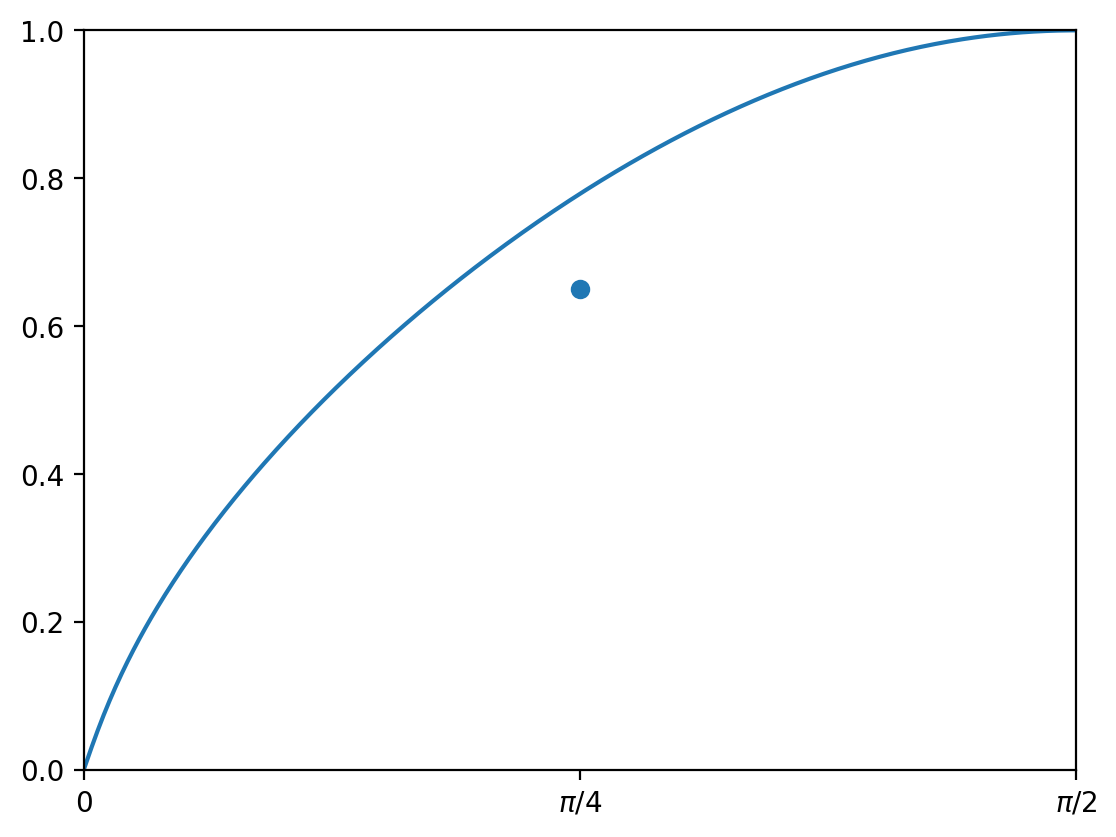

In [90]:
phi = np.linspace(0, 2*np.pi, 10_000)
alphas = np.linspace(0, np.pi/2, 501)[:-1]
mu_min = get_mu_min(alphas,eta=eta)
plt.plot(alphas, mu_min,label=f'$\eta={eta}$')

plt.xlim(0, np.pi/2)
plt.ylim(0, 1.0)
plt.xticks([0, np.pi/4, np.pi/2],
              [r'$0$', r'$\pi/4$', r'$\pi/2$'])

plt.scatter(alpha,beta)

# ax.grid(alpha=.3)
plt.ylim(0,1)
plt.show()

In [91]:
# 시뮬레이션 시간 설정
t_end = 20000
# Community 2의 초기 Daido parameter 설정
Q_init = 0.6
# Community 1의 초기 Daido parameter = 1

# OA ansatz
a1s,a2s,b1s,b2s,t = get_RQ_MOA6(1,Q_init,alpha=alpha,beta=beta,eta1=eta2,eta2=eta1,shift=0,t_end=t_end,dt=0.1)

R1s,R2s,Q1s,Q2s,t = get_RQ_MOA5(1,Q_init,alpha=alpha,beta=beta,eta1=eta2,eta2=eta1,shift=0,t_end=t_end,dt=0.1)

In [92]:
Q2 = get_Q3(1,Q_init,alpha=alpha,beta=beta,eta1=eta2,eta2=eta1,shift=0,t_end=t_end,dt=0.1)

In [93]:
N = 1000
R1_s_reg,R2_s_reg,Q1_s_reg,Q2_s_reg,t,thetas_reg = get_R_simul_wfT(1.,Q_init,N,alpha=alpha,beta=beta,eta1=eta2,eta2=eta1,shift=0,t_end=t_end,dt=0.1,seed=None)

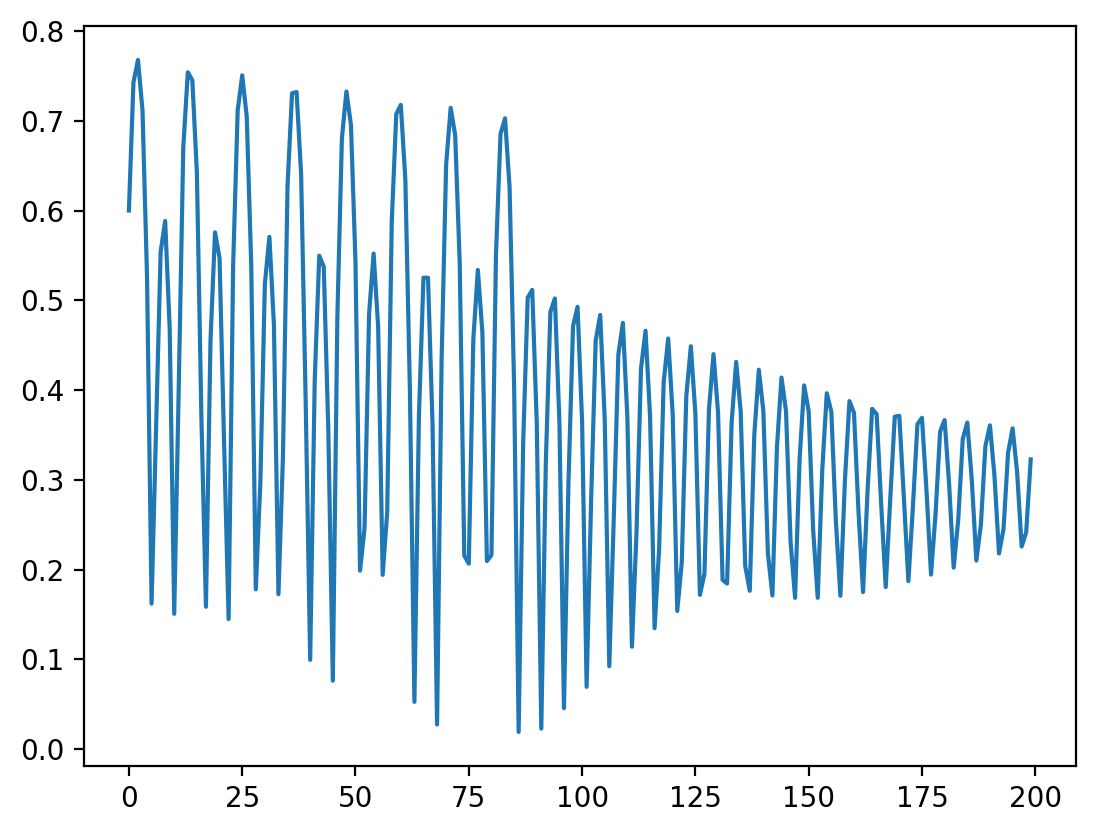

In [94]:
plt.plot(Q2)

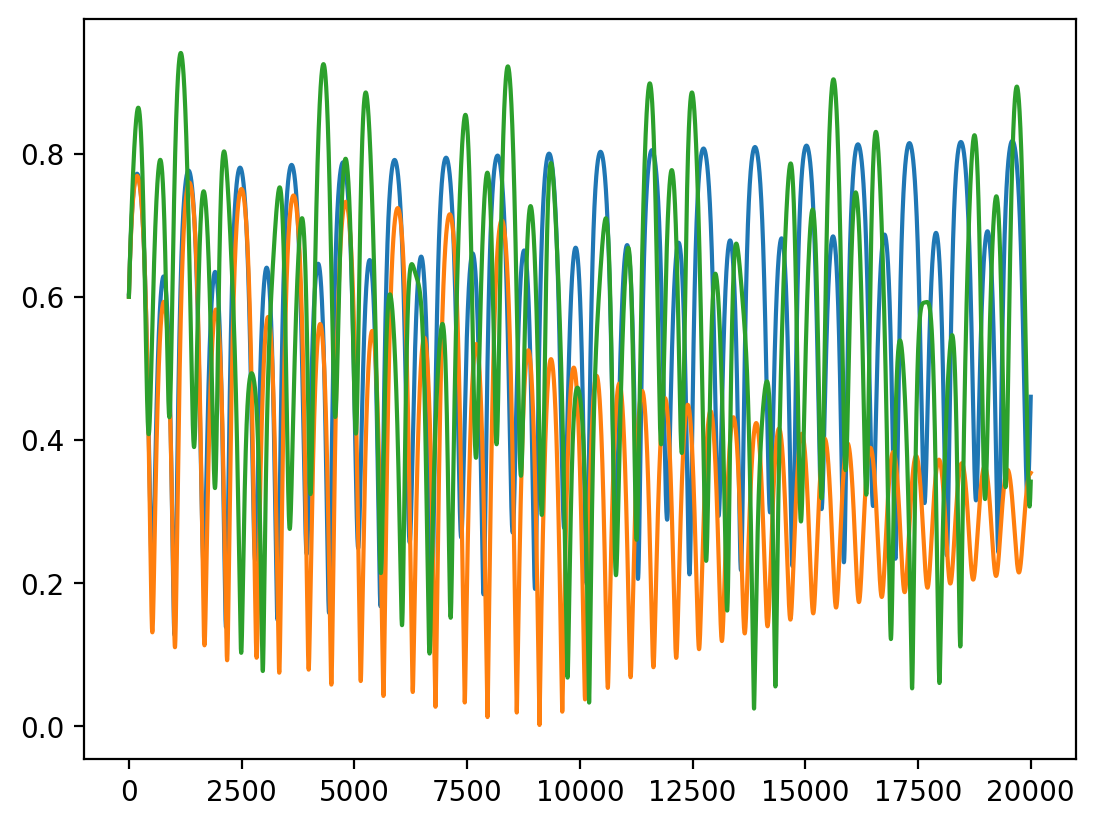

In [98]:
plt.plot(t,Q2_s_reg)
# plt.plot(t,np.abs(a2s)**2)
plt.plot(t,np.abs(b2s)**2)
plt.plot(t,Q2s)
# plt.plot(t,u[:,0]**2)

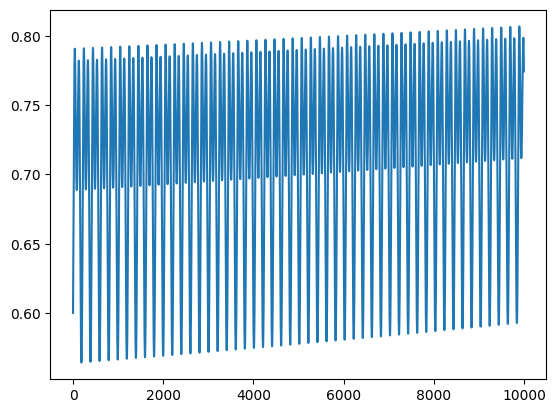

In [46]:
plt.plot(t,u[:,0]**2)

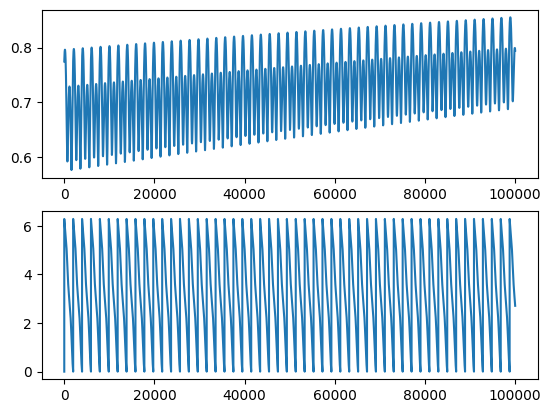

In [33]:
r = np.abs(a2s)
phi = (np.angle(a2s) - np.angle(a1s))%(np.pi*2)
plt.subplot(211)
plt.plot(r)
plt.subplot(212)
plt.plot(phi)

In [15]:
b1s

array([ 1.        +0.j        ,  0.99998333+0.00577383j,
        0.99993335+0.01154566j, ..., -0.87514556-0.48385974j,
       -0.87212538-0.48928245j, -0.8690716 -0.49468632j])

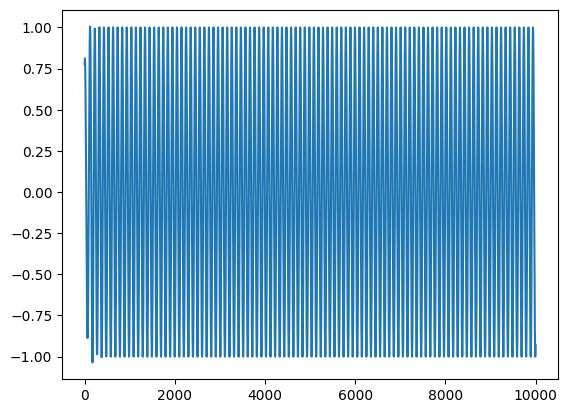

In [16]:
plt.plot(t,QZ2)

3.586572422841691 0.9999999999999954


StopIteration: 

<Figure size 6400x4800 with 0 Axes>

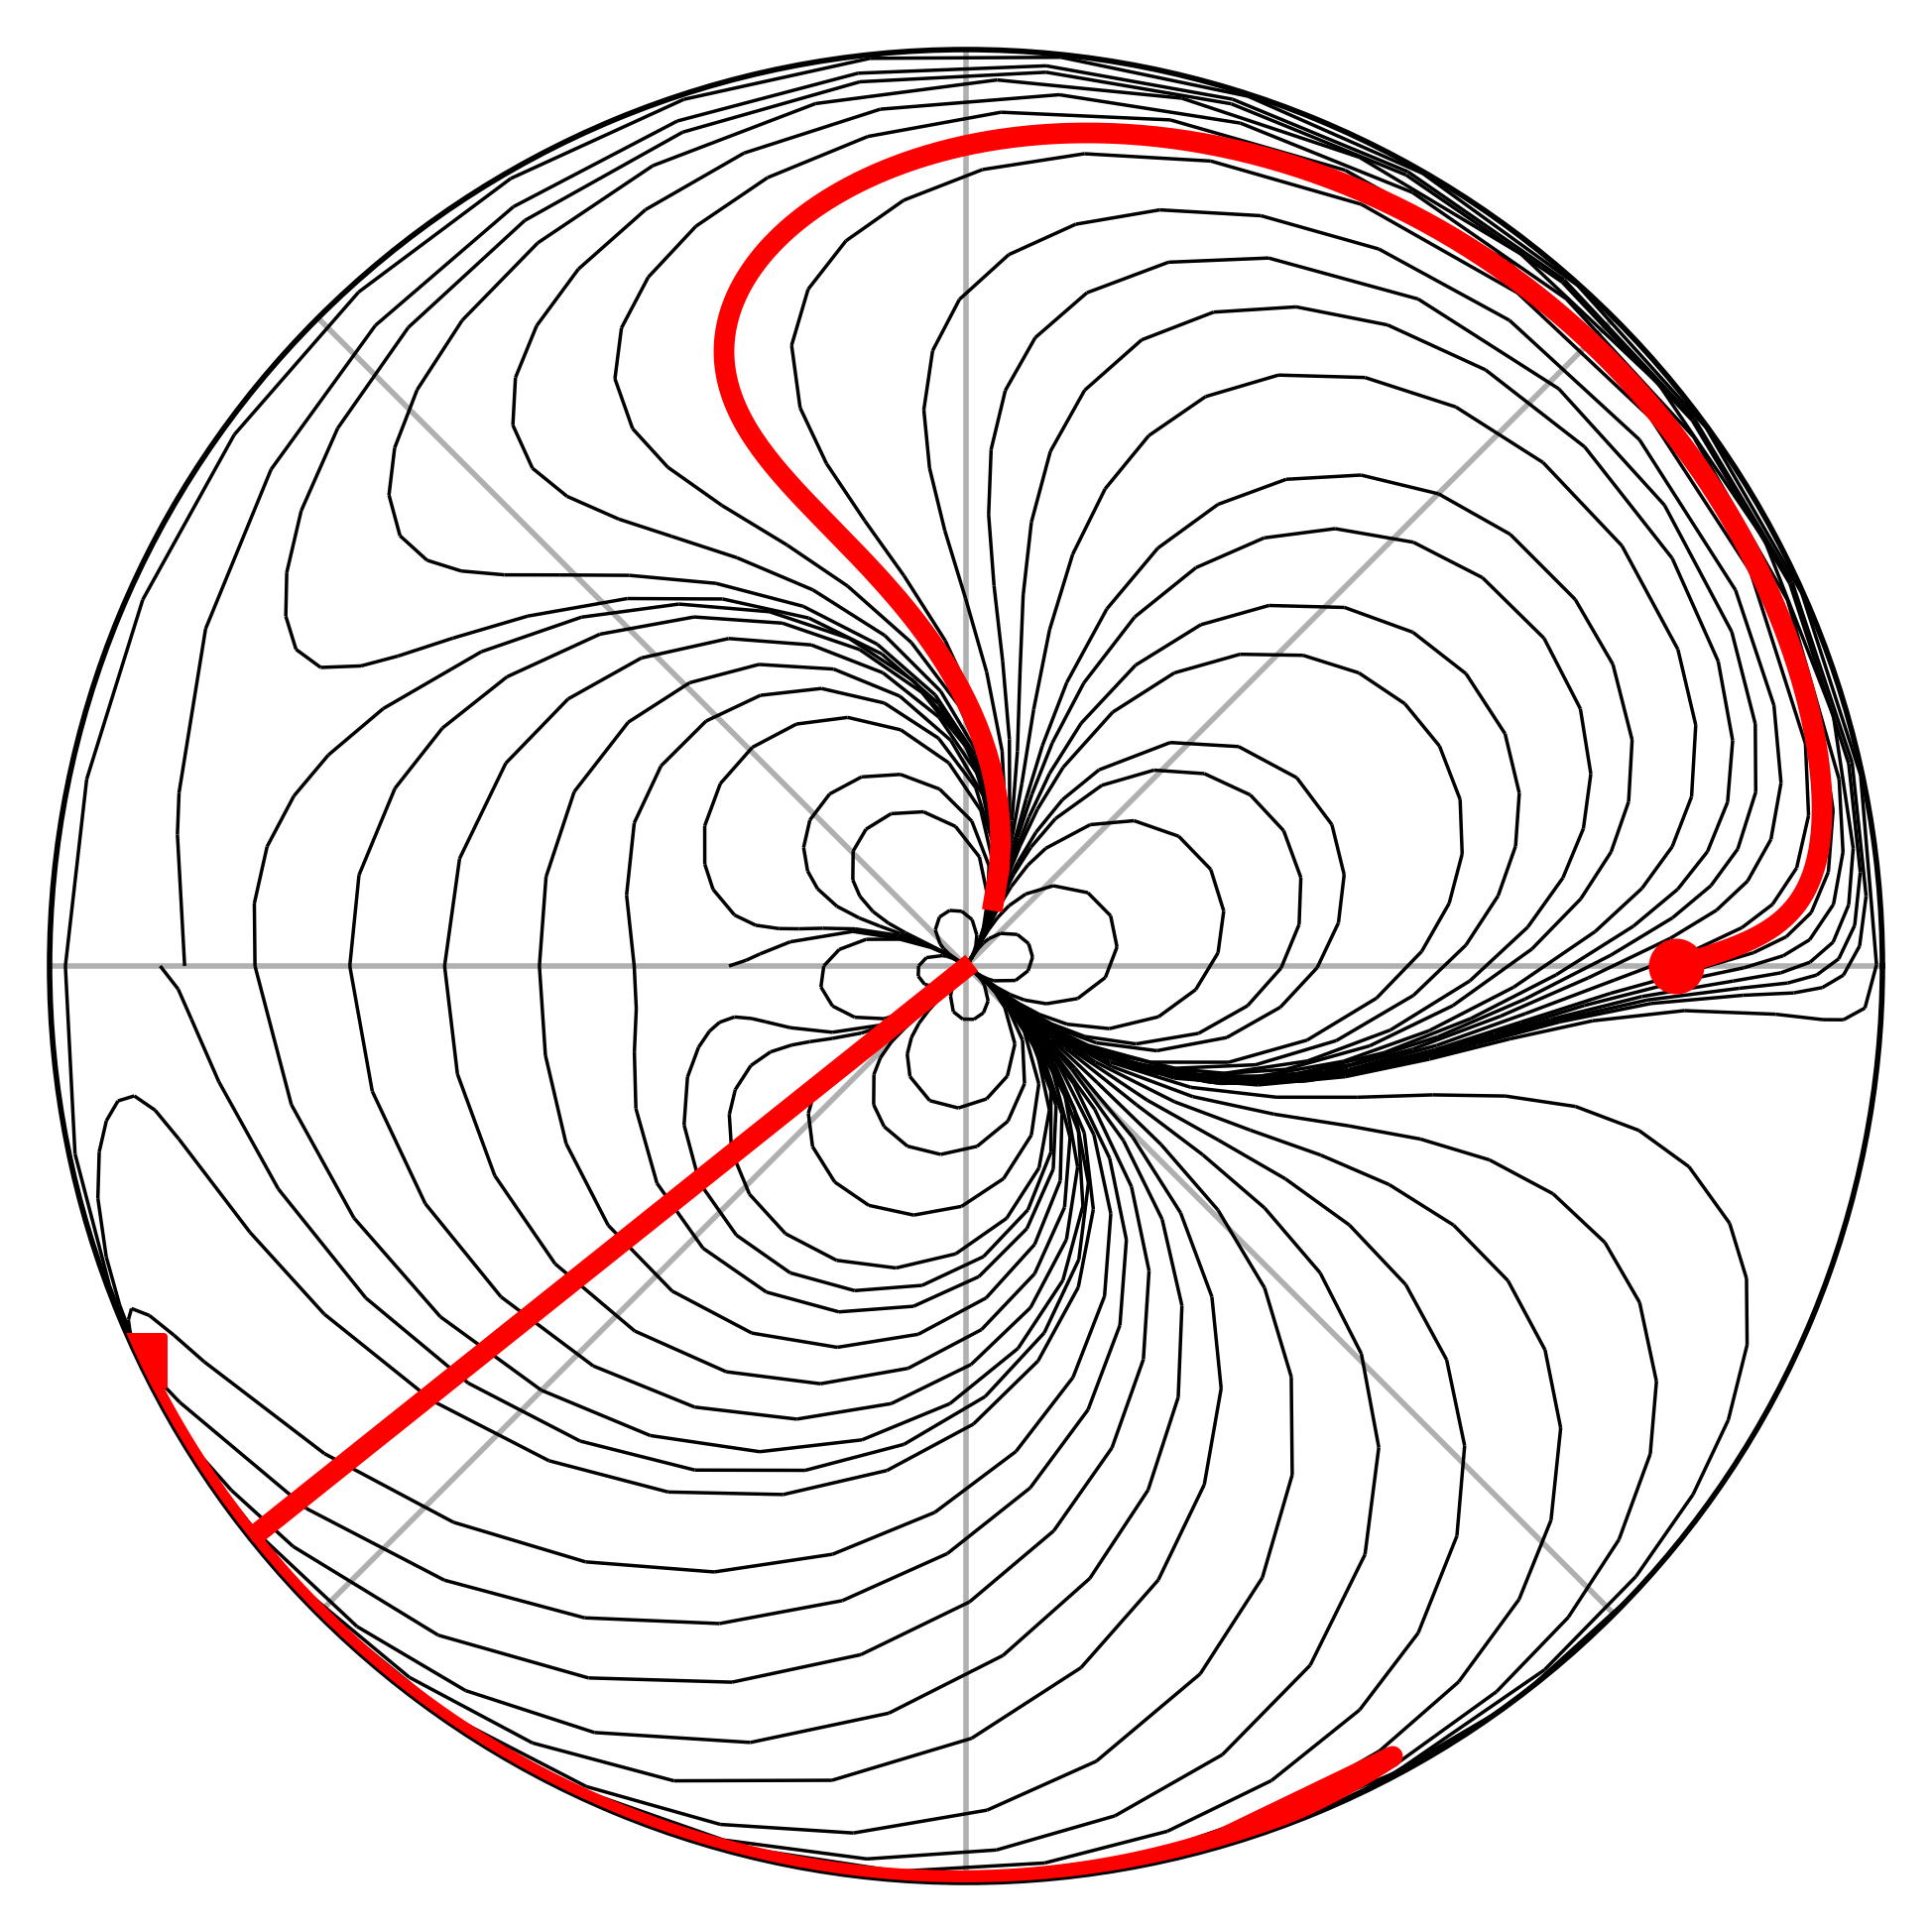

In [98]:

args = beta,alpha,eta1,eta2
t = np.arange(0,10000,0.1)
plt.figure(dpi=1000)


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},dpi=500)
plt.sca(ax)

u0s = [[np.sqrt(0.6),0]]
for i,u0 in enumerate(u0s):

	u = RK4(myFun4,np.array(u0,dtype=float),t,args=(args,))
	if i == 3:
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}^*(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),zorder=5)
	else:	
		c = plt.scatter(u[0,1]%(np.pi*2),u[0,0],s=50,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]),color='red',zorder=5)
	plt.scatter(u[-1,1]%(np.pi*2),u[-1,0],s=50,marker='s',zorder=7,color=c.get_facecolor())
	plt.plot(u[:,1],u[:,0],lw=3,alpha=1,zorder=6,color=c.get_facecolor())#,label=r'$\vec{x}(0)=(%.1f,%.1f)$'%(u0[0],u0[1]))
	print(u[-1,1]%(np.pi*2),u[-1,0])

# plt.plot(phi,r)
xs = np.linspace(-10,10,1000)
# plt.plot(xs,F(xs))
ax.grid(True)
ax.minorticks_on()
# plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1={eta1},\eta_2={eta2}$')

x = np.linspace(-1.5,1.5,400)
y = np.linspace(-np.pi,np.pi,800)
X,Y = np.meshgrid(x,y)

U,V = myFun5([X,Y],0,args)
M = (np.hypot(U,V))

xs = np.linspace(-3,-1e-5,1000)

# plt.scatter(phiA,1,zorder=6,color='green',marker='x')
# plt.scatter(phiB,1,zorder=6,color='blue',marker='x')
# plt.scatter(phiA+np.pi,1,zorder=6,color='green',marker='x')
# plt.scatter(phiB+np.pi,1,zorder=6,color='blue',marker='x')

# plt.plot(A,RA,zorder=5,color='green',fillstyle='none',marker='x')
# plt.plot(B,RB,zorder=5,color='green',fillstyle='none',marker='x')

plt.ylim(0,1.0)
plt.xlim(0,2*np.pi)
plt.yticks([])
plt.xticks([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi,5*np.pi/4,6*np.pi/4,7*np.pi/4],['','','','','','','',''])


ax = plt.gca()
ax.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='->',cmap = 'gray',linewidth=0.5,broken_streamlines=False,)
# ax.contourf(Y.T,X.T,M.T,color=M.T,zorder=3,levels=[0-1e-4,0+1e-4])
# ax.axhline(1,color='RED')
# plt.scatter(*np.array(PHI_R).T,zorder=5,color='blue',marker='s',label='Fixed point');
# plt.legend(loc=3)

plt.tight_layout()
plt.show()

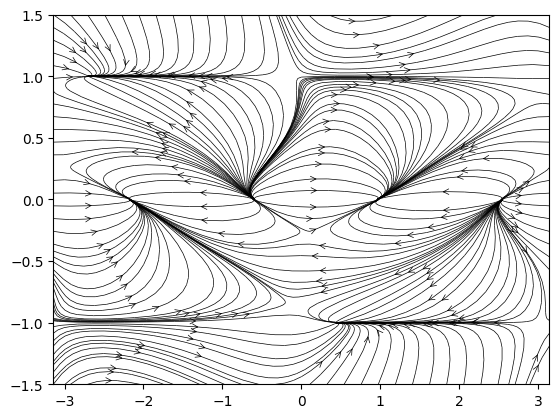

In [99]:
plt.streamplot(Y.T,X.T,V.T,U.T,color=M.T,zorder=3,density=1,arrowstyle='->',cmap = 'gray',linewidth=0.5,broken_streamlines=False,)

# plt.ylim(-1.5,1.5)

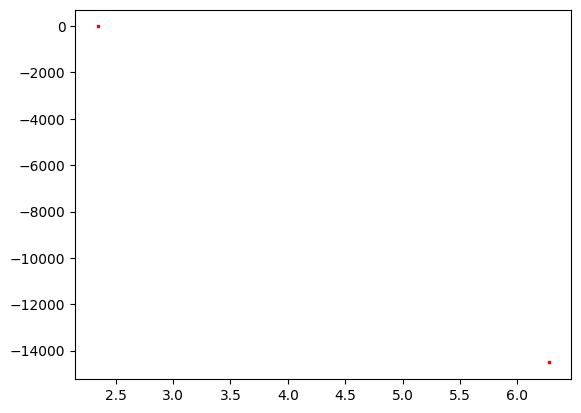

In [146]:
plt.scatter(u[-1,:]%(np.pi*2),u[-1,:],s=1,marker='s',zorder=7,color=c.get_facecolor())

# Animation

In [1]:
from parfor import parfor
from tqdm.notebook import tqdm

In [116]:
t_end = 20000
# Community 2의 초기 Daido parameter 설정
Q_init = 0.6

In [129]:
alpha = 1.2
beta = 0.6
eta1 = 0.01
eta2 = 0.1

In [130]:
alphas = np.linspace(0,np.pi/2,50)
betas = np.linspace(0,1,50)


Q2s_OA2 = []
for beta in tqdm(betas):
    @parfor(alphas,args=(beta,eta1,eta2),bar=False)
    def get_QR_long(alpha,beta,eta1,eta2):
        Q2 = get_Q3(1,Q_init,alpha=alpha,beta=beta,eta1=eta2,eta2=eta1,shift=0,t_end=t_end,dt=0.1)
        return Q2
    
    # RZ1,QZ1,RZ2,QZ2,a1s,b1s,a2s,b2s = zip(*get_QR_long)
    Q2 = get_QR_long
    Q2s_OA2.append(Q2)
Q2s_OA2 = np.array(Q2s_OA2)
# np.savez(f'OA2,eta={eta1/eta2}',Q2s=Q2s_OA2,eta1=eta1,eta2=eta2)

  0%|          | 0/50 [00:00<?, ?it/s]

In [125]:
t = np.arange(0,t_end,0.1)
t_temp = t[::1000]

In [126]:
phi = np.linspace(0, 2*np.pi, 10_000)

# α는 원하는 해상도로 – 여기선 0 ~ π/2 (끝점 제외) 500 점
alphas_ = np.linspace(0, np.pi/2, 501)[:-1]
alphas = np.linspace(0,np.pi/2,50)

C:\Users\kim9y\AppData\Local\Temp\ipykernel_45328\1290055947.py:5: RuntimeWarning: invalid value encountered in divide
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2
C:\Users\kim9y\AppData\Local\Temp\ipykernel_45328\1290055947.py:5: RuntimeWarning: invalid value encountered in sqrt
  mu = (-mu1 + np.sqrt(mu1**2 - mu2*mu0))/mu2


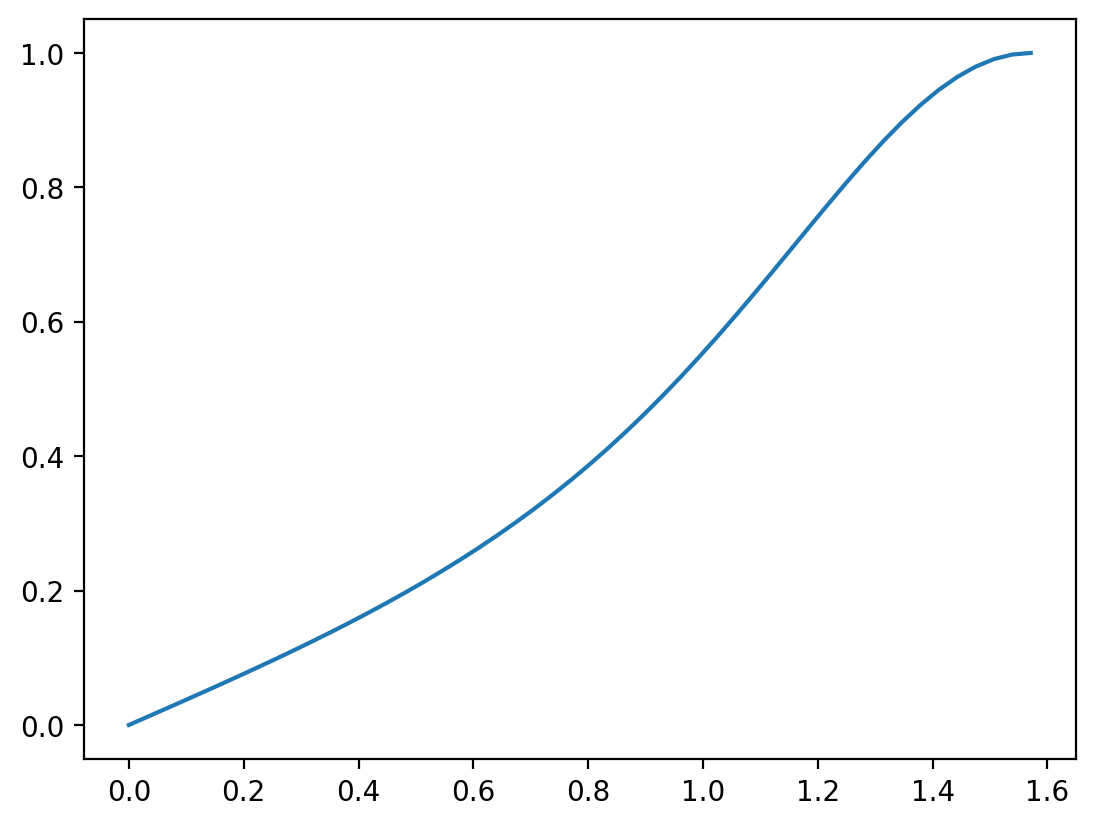

In [127]:
eta = eta2/eta1
mu_min = get_mu_min(alphas,eta=eta)
plt.plot(alphas,mu_min)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

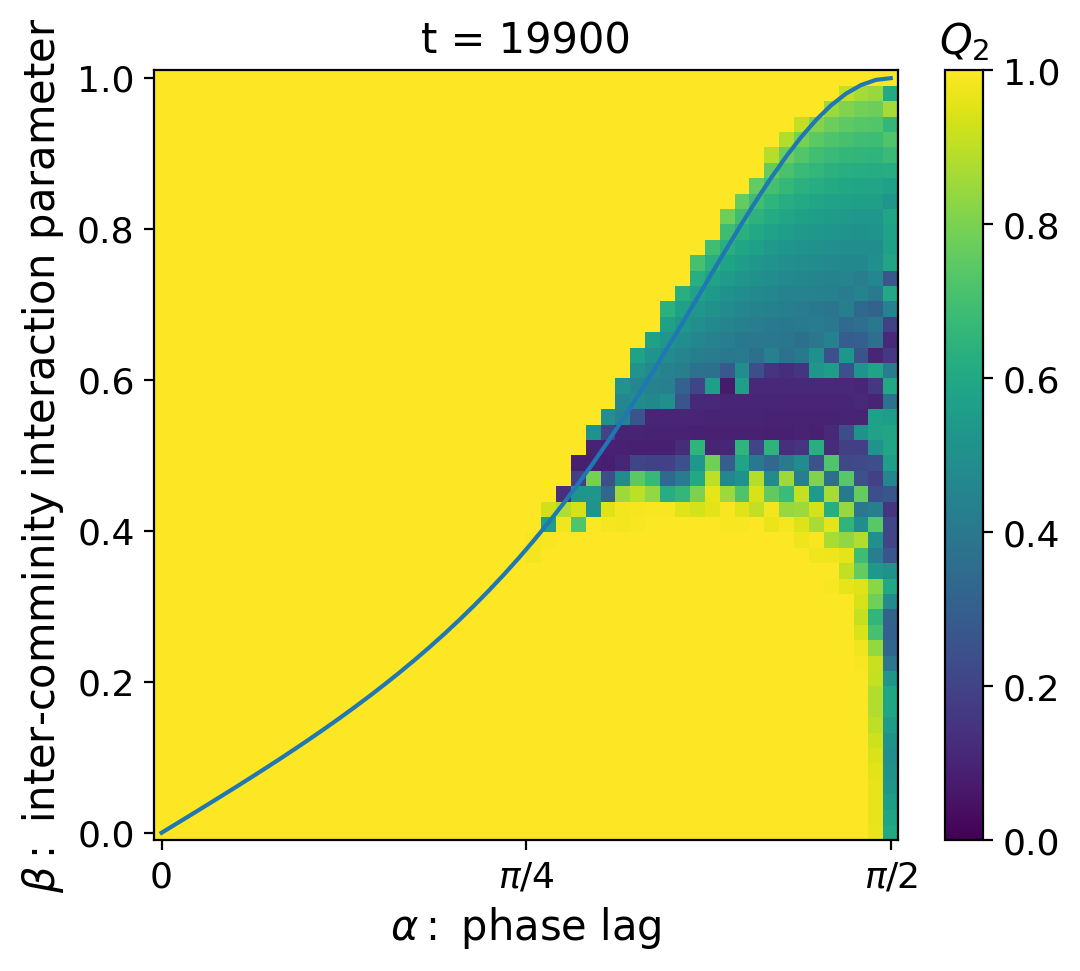

In [128]:
fig,(ax1) = plt.subplots(1,1,figsize=(6,5),dpi=100)

index = -1
im1 = ax1.pcolormesh(alphas,betas,Q2s_OA2[:,:,index],vmin=0.0, vmax=1)
ax1.set_aspect('auto')
text = ax1.set_title(rf't = {t_temp[index] :.0f}',fontsize=15)
ax1.plot(alphas,mu_min)
cbar1 = fig.colorbar(im1,ax=ax1,shrink=1)
cbar1.ax.set_title(r'$Q_2$',fontsize=15)
cbar1.ax.tick_params(labelsize=13)
plt.sca(ax1)
plt.xlabel(r'$\alpha:$ phase lag',fontsize = 15)
plt.ylabel(r'$\beta:$ inter-comminity interaction parameter',fontsize = 15)
plt.xticks([0,np.pi/4,np.pi/2],[0,'$\pi/4$','$\pi/2$'],fontsize=13)
plt.yticks(fontsize=13)

In [70]:
from IPython.display import HTML

In [71]:
def get_ani(idx):
    im1.set_array(Q2s_OA2[:,:,idx])
    text.set_text(rf't = ${t_temp[idx] :.0f}$')

len(t)
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(000,len(t_temp),1)
ani = FuncAnimation(fig,get_ani,frames=idxs,interval=50)
len(t)
# HTML(ani.to_jshtml())
ani.save(rf'HIGH ORDER CHIMERA/OA2 Q2,eta1 = {eta2},eta2 = {eta1}.mp4',dpi=300)